## Imports

In [ ]:
import numpy
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

# Over-sampling for imbalance problem
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

#SVM
from sklearn.svm import LinearSVC

## Pre-process data

In [2]:
os.chdir('/Users/hadi/Documents/Professional_development/DS/INSIGHT/Project/Data/Data_pro')
raw_data=pd.read_csv('Data_All_sorted_alpha_MVP_V7_2.csv')

#raw_data.index = raw_data.Neighbourhood

Y = pd.DataFrame(raw_data['Label'])

# Features selections
# options -: All fesstures:
# X = pd.DataFrame(raw_data[['Home price','Change in housing pricing','Low income population',\
#                              'Change in low income pop','Total Area','Total Population',\
#                              'Pop  25 - 34 years','Recent Immigrants','TTC Stops','Health Providers','Businesses',\
#                              'Social Housing Units','Rent Bank Applicants']])

# options -2: Higher correlation features
X = pd.DataFrame(raw_data[['Home price','Change in housing pricing','Low income population',\
                             'Change in low income pop','Total Population',\
                             'Pop  25 - 34 years','TTC Stops','Health Providers','Businesses',\
                             'Social Housing Units']])

# options -3: Highest correlation features
# X = pd.DataFrame(raw_data[['Change in low income pop',\
#                          'Pop  25 - 34 years','Businesses',\
#                         'Social Housing Units']])


# Resampling for imbalance
X_resampled, y_resampled = SMOTE().fit_resample(X, Y)
print(sorted(Counter(y_resampled).items()))


#Split Test Train Data
#Method -1: None Stratified
    #if original data:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 44)

    #if resampled data:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size = 0.1, random_state = 44)

# #Method -2 : Stratified
# split = StratifiedShuffleSplit(n_splits=1, test_size=.15, random_state=44) # split is to classify for stratify
# for train_index, test_index in split.split(raw_data, raw_data[['Label']]):  # column to use to stratify
#     X_train = X.loc[train_index]
#     X_test = X.loc[test_index]
#     Y_train = Y.loc[train_index]
#     Y_test = Y.loc[test_index]

# encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(Y_train)
# encoded_Y_train = encoder.transform(Y_train)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_Y_train = np_utils.to_categorical(encoded_Y_train)

# encoder.fit(Y_test)
# encoded_Y_test= encoder.transform(Y_test)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_Y_test= np_utils.to_categorical(encoded_Y_test)

#Standardize the Data
# X_train = pd.DataFrame(StandardScaler().fit_transform(X_train)) 
# X_test = pd.DataFrame(StandardScaler().fit_transform(X_test))
print(len(Y_test))


[(1, 167), (2, 167), (3, 167), (4, 167)]
67


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Modeling

In [3]:
# Gaussian Naive Bayes Modelling 

# define model
model = GaussianNB(priors=None, var_smoothing=1e-09)
#from sklearn.utils.validation import column_or_1d
#dummy_Y_train = column_or_1d(Y_train, warn=True)

#if original data be used:
#model.fit(X_train, Y_train.values.ravel())

#if resampled data used: (output is np.array)
model.fit(X_train, Y_train)

# # save the model to disk
predictive_model_Gau = 'finalized_Gau_model_CL.sav'
pickle.dump(model, open(predictive_model_Gau, 'wb'))    

## Validation 

In [4]:
# load the model from disk
loaded_model = pickle.load(open('finalized_Gau_model_CL.sav', 'rb'))
y_pred_Gau= loaded_model.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred_Gau))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(Y_test,y_pred_Gau)

print(Y_test)

0.5522388059701493
[3 3 2 1 1 2 1 1 4 4 1 1 1 1 1 4 1 3 1 3 1 1 4 1 4 2 3 3 3 1 1 1 1 3 1 1 1
 3 3 1 1 4 1 3 1 2 3 4 4 2 4 4 3 1 4 1 3 3 1 3 3 3 4 2 4 4 1]


Text(89.18, 0.5, 'True Value')

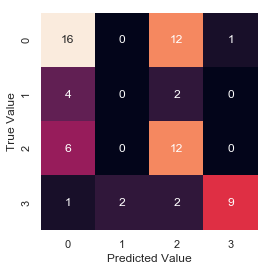

In [5]:
import seaborn as sns; sns.set()
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

### Trying Cross-Validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut

#from sklearn import cross_validation
#sklearn.model_selection.cross_val_score
scores=model_selection.cross_val_score(model, X_train, Y_train, cv=cross_validation.LeaveOneOut(1))
scores

## Visualisation

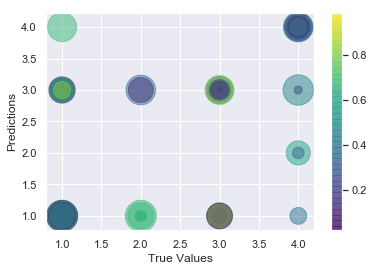

In [6]:
import numpy as np
rng=np.random.RandomState(0)
colors=rng.rand(67)
sizes=1000*rng.rand(67)
plt.scatter(Y_test,y_pred_Gau, c=colors, s=sizes, alpha=0.5, cmap='viridis')
plt.colorbar()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig('testplot.png')

## Predictions

In [8]:
#Load prediction data 
Test_2016=pd.read_csv('/Users/hadi/Documents/Professional_development/DS/INSIGHT/Project/Data/Data_pro/Data_All_sorted_alpha_MVP_2016_V7_1.csv')
Test_2016.index = Test_2016.Neighbourhood
Y_2021 = pd.DataFrame(Test_2016['Label'])

# Features selections
# options -: All fesstures:
# X = pd.DataFrame(raw_data[['Home price','Change in housing pricing','Low income population',\
#                              'Change in low income pop','Total Area','Total Population',\
#                              'Pop  25 - 34 years','Recent Immigrants','TTC Stops','Health Providers','Businesses',\
#                              'Social Housing Units','Rent Bank Applicants']])

# options -2: Higher correlation features
X_2016 = pd.DataFrame(Test_2016[['Home price','Change in housing pricing','Low income population',\
                             'Change in low income pop','Total Population',\
                             'Pop  25 - 34 years','TTC Stops','Health Providers','Businesses',\
                             'Social Housing Units']])

# options -3: Highest correlation features
# X = pd.DataFrame(raw_data[['Change in low income pop',\
#                          'Pop  25 - 34 years','Businesses',\
#                         'Social Housing Units']])

# load the model from disk
loaded_model = pickle.load(open('finalized_Gau_model_CL.sav', 'rb'))
Y_2021_Gau= loaded_model.predict(X_2016)
print(Y_2021_Gau)

[1 4 3 4 4 3 4 4 3 3 3 4 3 1 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 1 3 4 4 3 3 3 3
 1 3 1 3 3 1 3 3 4 3 3 3 4 4 3 3 3 3 3 3 3 4 3 3 1 4 1 3 4 3 3 3 3 3 3 3 4
 3 3 4 4 3 4 1 1 3 4 3 3 3 4 3 4 3 1 1 3 1 3 3 3 4 3 1 3 4 4 3 3 3 4 4 3 1
 3 1 3 3 1 3 3 3 4 1 4 1 2 3 4 4 3 1 4 3 3 3 3 3 4 3]
